In [1]:
from ipy import *
import PAD
%matplotlib inline

In [56]:
#####  Aug 04, 2015 - 12:00 - 14:00
afg_file       = 'C:/Yuggoth/Events/2015/Aug 04/mms1_afg_srvy_l2pre_20150804_v3.11.0.cdf'
debug_file     = 'C:/Yuggoth/Events/2015/Aug 04/mms1_fpi_fast_l2_des-debug_20150804120000_v3.1.0.cdf'
dist_file      = 'C:/Yuggoth/Events/2015/Aug 04/mms1_fpi_fast_l2_des-dist_20150804120000_v3.1.0.cdf'
moms_file      = 'C:/Yuggoth/Events/2015/Aug 04/mms1_fpi_fast_l2_des-moms_20150804120000_v3.1.0.cdf'

####Photoelectron correction file
photo_file     = 'C:/Yuggoth/Events/2015/mms_fpi_fast_l2_des-bgdist_v1.1.0_p0-2.cdf'

obs            = 'mms1'
ver            = 'ver3'

CDFs           = {}
CDFs['afg']    = pycdf.CDF(afg_file)
CDFs['bfield'] = pycdf.CDF(debug_file)
CDFs['dist']   = pycdf.CDF(dist_file)
CDFs['moms']   = pycdf.CDF(moms_file)
CDFs['photo']  = pycdf.CDF(photo_file)
date           = 'Aug 06 1200-1400'

time_format    = '%H:%M:%S'

In [57]:
#corrections
corrections_on = 1
dude = PAD.load_e_data(CDFs,obs,'des',ver,corrections_on,correction_override = 0.0)

['bfield', 'moms', 'afg', 'dist', 'photo'] 0.75


# QA Section

A quick QA to ensure that the epochs in the debug file are in sync with those in the distribution file

In [58]:
N = 0
print 'Starting epochs for debug and dist:'
print 'Debug file:         ', CDFs['bfield']['Epoch'][N]
print 'Distribution file:  ', CDFs['dist']['Epoch'][N]
print '\n'
N = int(len(CDFs['bfield']['Epoch'])/2)
print 'Epochs for debug and dist at halfway (N=%d):' % N
print 'Debug file:         ', CDFs['bfield']['Epoch'][N]
print 'Distribution file:  ', CDFs['dist']['Epoch'][N]
print '\n'
N = -1
print 'Ending Epochs for debug and dist'
print 'Debug file:         ', CDFs['bfield']['Epoch'][N]
print 'Distribution file:  ', CDFs['dist']['Epoch'][N]
print '\n'

Starting epochs for debug and dist:
Debug file:          2015-08-04 12:55:45.260073
Distribution file:   2015-08-04 12:55:45.260073


Epochs for debug and dist at halfway (N=428):
Debug file:          2015-08-04 13:27:51.266328
Distribution file:   2015-08-04 13:27:51.266328


Ending Epochs for debug and dist
Debug file:          2015-08-04 13:59:57.274147
Distribution file:   2015-08-04 13:59:57.274147




Look at the magnetic field and find the start_time_label

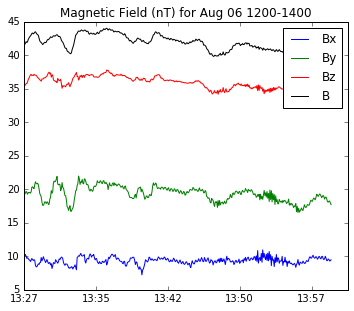

In [59]:
start_time_label = 428
time_slice       = slice(start_time_label,-1)
fig_mag          = plt.figure(23,figsize=(5.8,4.8))
ax_mag           = fig_mag.add_subplot(1,1,1)
ax_mag.plot(dude['bfield'][time_slice,0]*dude['bfield'][time_slice,3],label='Bx')
ax_mag.plot(dude['bfield'][time_slice,1]*dude['bfield'][time_slice,3],label='By')
ax_mag.plot(dude['bfield'][time_slice,2]*dude['bfield'][time_slice,3],label='Bz')
ax_mag.plot(dude['bfield'][time_slice,3],'k-',label='B')
ax_mag.legend()
n_B = len(dude['bfield'][:,0])
plt.title('Magnetic Field (nT) for %s' % date)
x        = np.arange(428,n_B,100)
x_labels  = []
for px in x:
    x_labels.append(dt.datetime.strftime(dude['edist']['Epoch'][px],'%H:%M'))
plt.xticks(x-start_time_label,x_labels,rotation=0)
plt.savefig('C:/Users/cschiff/Documents/GitHub/PAD/Aug 04 - pictures/Aug 04 - mag_field.pdf',format='pdf',dpi=1200)
plt.show()

Ensure that photoelectrons have been corrected (energy 1 and greater)

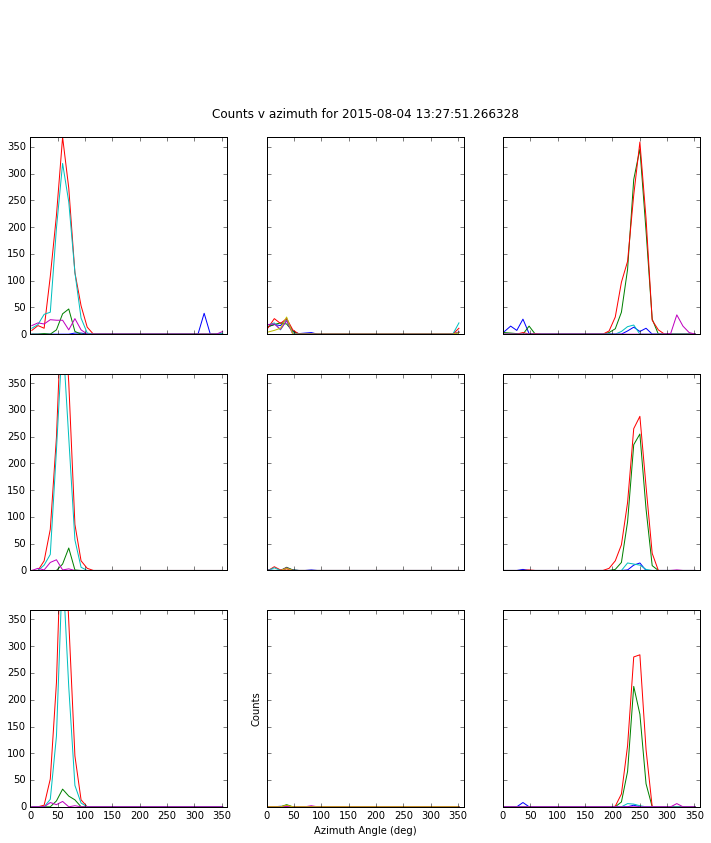

In [60]:
time_label = int(len(CDFs['bfield']['Epoch'])/2)
num_rows   = 3
fig7,axes  = plt.subplots(nrows=num_rows,ncols=3,figsize=(12,12),sharex=True,sharey=True)
for row in range(num_rows):
    for col in range(3):
        if col == 0:
            pix_range = slice(0,5)
        if col== 1:
            pix_range = slice(5,11)
            axes[row][col].annotate('Energy = %.2f ev'  % dude['parms']['Erg'][row],xy=(160,900),fontsize=10)
        if col == 2:
            pix_range = slice(11,16)
        axes[row][col].plot(dude['parms']['Phi'],dude['counts'][time_label,:,pix_range,row])
        axes[row][col].set_ylim([0,np.max(dude['counts'][time_label,:,:,0])])
        axes[row][col].set_xlim([0,360])

axes[0][1].set_title('Counts v azimuth for %s\n' % dude['edist']['Epoch'][time_label])        
axes[row][col-1].set_xlabel('Azimuth Angle (deg)')
axes[row][1].set_ylabel('Counts')
plt.show()

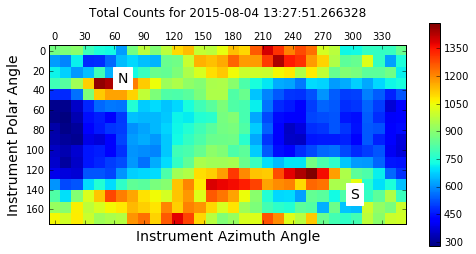

In [61]:
erg        = 1
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi

if BPhi < 0:
    BPhi   = BPhi + 360

BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['counts'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Total Counts for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

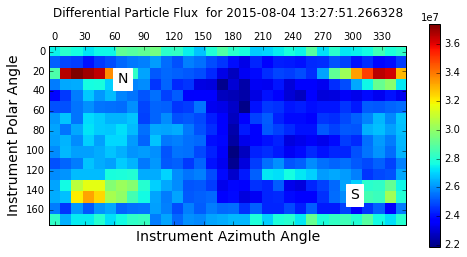

In [62]:
erg        = 0
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi
if BPhi < 0:
    BPhi   = BPhi + 360
BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['jN'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Differential Particle Flux  for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

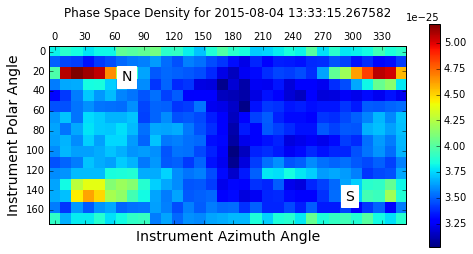

In [63]:
erg        = 0
time_label = 500
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi
if BPhi < 0:
    BPhi   = BPhi + 360
BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['edist']['Dist'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Phase Space Density for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

# Differential Counter-Streaming

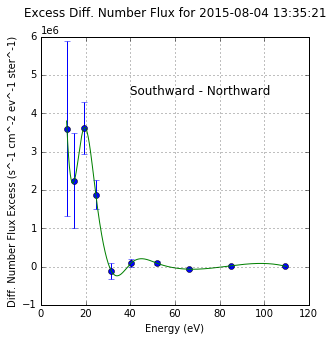

In [66]:
import scipy.interpolate as interp

fig_err = plt.figure(34,figsize = (4.8,4.8))
ax_err  = fig_err.add_subplot(1,1,1)

#prepare the data
time_label = 528
NW_Edata, NW_FAC = PAD.compute_limited_PAD(time_label,0,10,0,20,dude)
temp,     NW_err = PAD.compute_limited_PAD_error(time_label,0,32,0,20,dude)
SW_Edata, SW_FAC = PAD.compute_limited_PAD(time_label,0,10,160,180,dude)
temp,     SW_err = PAD.compute_limited_PAD_error(time_label,0,32,160,180,dude)

#excel error estimate
excel_err = np.array([2162983.728, 1158918.272, 621056.6908, 332975.9307, 178584.8976,\
             95836.2547,  51473.0561,  27677.90703, 14894.96117, 8027.021345])
est_err   = (NW_err + SW_err)/2.0

Excess = SW_FAC - NW_FAC
my_spline = interp.splrep(NW_Edata,Excess)
erange    = np.linspace(11.5,110,1000)
my_data   = interp.splev(erange,my_spline)

ax_err.set_xlabel('Energy (eV)')
ax_err.set_ylabel('Diff. Number Flux Excess (s^-1 cm^-2 ev^-1 ster^-1)')
ax_err.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax_err.errorbar(NW_Edata[0:10],Excess[0:10],yerr=excel_err+est_err[0:10],fmt='o')
ax_err.plot(erange,my_data)
ax_err.annotate('Southward - Northward',xy=(40,4.5e6),fontsize=12)
ax_err.grid('on')
ax_err.set_title('Excess Diff. Number Flux for %s\n' % \
                 dt.datetime.strftime(dude['edist']['Epoch'][time_label],'%Y-%m-%d %H:%M:%S'))
plt.savefig('C:/Users/cschiff/Documents/GitHub/PAD/Aug 04 - pictures/Aug 04 - Excess.pdf',format='pdf',dpi=1200)
#dt.datetime.strftime(dude['edist']['Epoch'][px],'%H:%M'))

# Production runs of plots

In [65]:
start_time_label = 428
fig_path = 'c:/Yuggoth/Events/2015/Aug 04/'
for i in range(start_time_label,len(dude['edist']['Epoch']),50):
    PAD.create_flux_survey_spectrum(i,date,fig_path,dude)
    PAD.create_smooth_survey_PAD_plot(i,date,fig_path,dude)
    PAD.create_raw_survey_PAD_plot(i,0,32,date,fig_path,dude)
    PAD.create_raw_survey_PAD_plot_LM(i,0,32,date,fig_path,dude)
    PAD.visualize_FPI_pixels_in_LM(i,date,fig_path,dude)

In [36]:
#dude['edist']['Dist']
for erg_index in range(0,10):
    PAD_counts = np.ndarray.flatten(dude['jN'][528][:,:,erg_index])
    alpha      = np.zeros(32*16)
    counter    = 0
    for i in range(0,32):
        for j in range(0,16):
            B              = dude['bfield'][528][0:3]
            phi            = CDFs['dist']['mms1_des_phi_fast'][i]*np.pi/180
            theta          = CDFs['dist']['mms1_des_theta_fast'][j]*np.pi/180
            v              = [-np.cos(phi)*np.sin(theta),\
                              -np.sin(phi)*np.sin(theta),\
                              -np.cos(theta)]
            alpha[counter] = np.arccos(B.dot(v))*180/np.pi
            counter        = counter + 1
    count20 = 0
    for i in range(512):
        if alpha[i] <= 20:
            count20 = count20 + PAD_counts[i]
    count160 = 0
    for i in range(512):
        if alpha[i] >= 160:
            count160 = count160 + PAD_counts[i]
    print count20, count160, count160-count20

56180845.3122 63695417.8742 7514572.56204
33779655.6009 38122892.3633 4343236.76238
20281542.1314 25020566.4727 4739024.34134
12594782.5159 15075401.313 2480618.7971
7588619.05523 7796566.70617 207947.650938
3917780.59186 4181857.04943 264076.457573
1726901.52234 1910339.17733 183437.654994
815741.572005 782871.564082 -32870.0079235
361610.766033 404106.513217 42495.747184
169168.248107 194138.586418 24970.3383101


In [31]:
NW_FAC

array([ 56180845.31218469,  33779655.60090061,  20281542.13136853,
        12594782.51594257,   7588619.05523157,   3917780.59185856,
         1726901.52233749,    815741.57200519,    361610.76603347,
          169168.24810749])

In [33]:
SW_FAC

array([ 63695417.87422347,  38122892.36328118,  25020566.47270715,
        15075401.31304141,   7796566.70616925,   4181857.04943132,
         1910339.17733161,    782871.56408172,    404106.51321748,
          194138.58641754])